In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sps

%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,8

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [3]:
### Ваши код/вычесления...

#n = ....  #Запишите в эту переменную ваш высчитанный ответ!

confidence = 0.95
sigma = 225**0.5
Z = sps.stats.norm.ppf( (1+confidence)/2 , loc = 0, scale = 1) # Если это нормальное распределение!!
Delta = 3
n = round( ( ( sigma * Z ) / Delta )**2 )
n

96

In [4]:
#t-распр
def t_distrib_n(step, sigma, n=2, alpha=0.05, debug = False):
    se = sigma / n**0.5
    df = n - 1
    t_a_n = sps.stats.t.ppf(1 - alpha/2, df) # коэф стьюдента, кот зависит от альфа(порога) и количества значений в выборке (n)
    if debug: print(t_a_n, t_a_n * se,  (step - t_a_n * se)/step )
    
    while True:
        if abs( (step - t_a_n * se)/step ) > 0.01:
            n +=1
            se = sigma / n**0.5
            df = n - 1
            t_a_n = sps.stats.t.ppf(1 - alpha/2, df)
            if debug: print(t_a_n, t_a_n * se,  (step - t_a_n * se)/step )
        else: return n
  

In [5]:
n = t_distrib_n(3,15,debug = False)
n

97

In [6]:
#Не меняйте этот код, он нужен для проверки вашего ответа ответа!
if n%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(n)) == -6483854632660926687: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.95, а не 0.975. Смотри формулу!")
elif hash(str(n)) != 8942973788178395504: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


In [7]:
# Хеш не корректен 
## hash(str(n)) != 8942973788178395504 : print("Нет, Неверно!") 

h = 8942973788178395504
n = 1
while True:
    if hash(str(n) ) == h:
        print(n)
        break
    else: 
        if n==1000: 
            print('We have checked everithing Sir, nothing', end = '')
            break
        elif n%50==0: print('.', end = '')
        n += 1

...................We have checked everithing Sir, nothing

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [10]:
### Ваши код/вычесления...

#L = ....  #Запишите в эту переменную ваш высчитанный ответ!


In [11]:
confidence = 0.98
sigma = 15
n = 25


se = sigma / n**0.5
t = sps.stats.t.ppf( (1+confidence)/2 , n-1)
delta = t * se
L = round(2 * delta)

print(f'se = {se}, t = {t}, delta ={delta}, L = {L}')

se = 3.0, t = 2.4921594731575762, delta =7.476478419472729, L = 15


Среднее ГС:  133.615
Среднее из задачи:  130
	 шаг при пороге 1% или 98% уровне доверия = 7.48
Из диаграммы видно, что 98% доверительный интервал (между зелеными линиями) таки включает среднее значение выборки


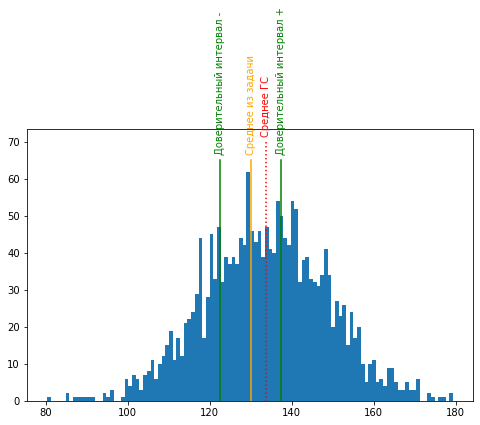

In [12]:
# построим распределение ГС, мы знаем что среднее ГС будет иметь стандартное отклонение среднего se = sigma / n**0.5
plt.figure(figsize=(8,5))
m = 130

A = sps.stats.norm.rvs(loc = m + se , scale = sigma, size = 2000 ) 
plt.hist(A, bins = 110)

m_dist = round(np.mean(A),3)
print('Среднее ГС: ',m_dist)
plt.plot([m_dist , m_dist], [70,0],':m', c= 'red')
plt.text(m_dist, 72, 'Среднее ГС', c= 'red', rotation = 'vertical', ha = 'center')

print('Среднее из задачи: ',m)
plt.plot([m , m], [65,0], c= 'orange')
plt.text(m, 67, 'Среднее из задачи', c= 'orange', rotation = 'vertical', ha = 'center')

plt.plot([m-delta , m-delta], [65,0], c= 'green')
plt.text(m-delta, 67, 'Доверительный интервал -', c= 'green', rotation = 'vertical', ha = 'center')
plt.plot([m+delta , m+delta], [65,0], c= 'green')
plt.text(m+delta, 67, 'Доверительный интервал +', c= 'green', rotation = 'vertical', ha = 'center')
print(f'\t шаг при пороге {round((1-confidence)/2*100)}% или {round(confidence*100)}% уровне доверия = {round(delta,2)}')
print('Из диаграммы видно, что 98% доверительный интервал (между зелеными линиями) таки включает среднее значение выборки')

In [13]:
#Не меняйте этот код, он нужен для проверки ответа!
if L%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(L)) == 8859716730303628099: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.98, а не 0.99. Смотри формулу!")
elif hash(str(L)) != 6091462292841498317: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


In [14]:
#hash(str(n)) != 6091462292841498317 : print("Нет, Неверно!") ->> Хеш не корректен
h = 6091462292841498317
n = 1
while True:
    if hash(str(n) ) == h:
        print(n)
        break
    else: 
        if n==1000: 
            print('We have checked everithing Sir, nothing', end = '')
            break
        elif n%50==0: print('.', end = '')
        n += 1

...................We have checked everithing Sir, nothing

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

Критерий Стьюдента с модулем = 1.6896656903039952e-08
Zero hypothesis is dissmissed. Difference between samples is significant.
Критерий Стьюдента без модуля = 1.6896656903039952e-08
Zero hypothesis is confirmed. Difference between samples is negligeable.


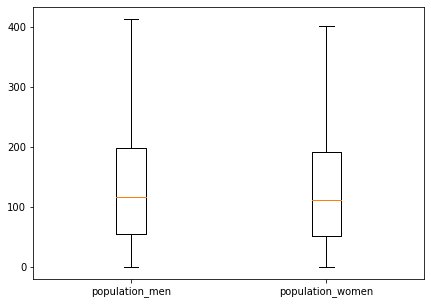

(array([2.164e+03, 2.109e+03, 1.708e+03, 1.514e+03, 1.267e+03, 9.890e+02,
        7.700e+02, 4.960e+02, 3.690e+02, 2.650e+02, 1.520e+02, 1.020e+02,
        5.100e+01, 1.600e+01, 1.400e+01, 6.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00]),
 array([8.72683841e-03, 3.66094966e+01, 7.32102663e+01, 1.09811036e+02,
        1.46411806e+02, 1.83012576e+02, 2.19613345e+02, 2.56214115e+02,
        2.92814885e+02, 3.29415655e+02, 3.66016424e+02, 4.02617194e+02,
        4.39217964e+02, 4.75818734e+02, 5.12419503e+02, 5.49020273e+02,
        5.85621043e+02, 6.22221813e+02, 6.58822582e+02, 6.95423352e+02,
        7.32024122e+02]),
 <BarContainer object of 20 artists>)

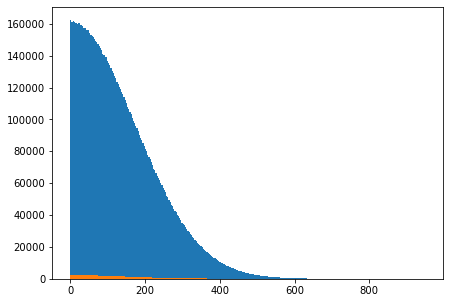

In [15]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

### 
# судя по выборке, то это скорее популяция мужчин с ростом 171. А если так : stats.norm.rvs(loc=171, scale=19, size=11000000), то это выборка мужчин со средним ростом 171 
confidence = 10**-3
# судя по размерам выборки - size1= 11 000 000  и size2= 12 000 то нужно применять ttest 1 sample:

# популяция не может быть отрицательной поэтому берем значения выборки по модулю
student_criteria_1sample = stats.ttest_1samp( a = abs(population_women), popmean = np.array(abs(population_men)).mean())
print(f'Критерий Стьюдента с модулем = { student_criteria_1sample[1] }')

if student_criteria_1sample[1] < confidence: print('Zero hypothesis is dissmissed. Difference between samples is significant.')
else: print('Zero hypothesis is confirmed. Difference between samples is negligeable.')

# Если бы не брали значения по модулю :
student_criteria_1sample_ = stats.ttest_1samp( a = population_women, popmean = np.array(population_men).mean())
print(f'Критерий Стьюдента без модуля = { student_criteria_1sample[1] }')

if student_criteria_1sample_[1] < confidence: print('Zero hypothesis may be dissmissed. Difference between samples is significant.')
else: print('Zero hypothesis is confirmed. Difference between samples is negligeable.')

    
#boxplot
rcParams['figure.figsize'] = 7,5
data = [abs(population_men),abs(population_women) ]
fig, ax = plt.subplots()
ax.boxplot(data,0,'', labels = ['population_men','population_women'],vert = True)
plt.show()

#hist plot
plt.hist(abs(population_men), bins =300)
plt.hist(abs(population_women), bins =20)
plt.show()

Критерий Стьюдента = 0.0
Zero hypothesis may be dissmissed. Difference between samples is significant.


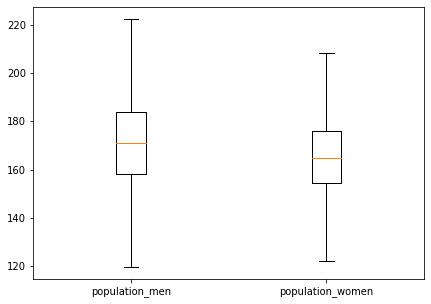

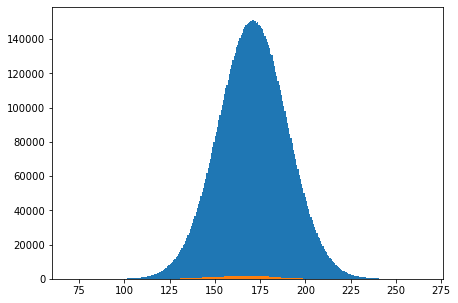

In [16]:
#Выборка со средним ростом 171 и 165
population_men  = stats.norm.rvs(loc=171, scale=19, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000)  # Выборка женщин со средним ростом 165

### 
confidence = 10**-3

student_criteria_1sample = stats.ttest_1samp( a = population_women, popmean = np.array(population_men).mean())
print(f'Критерий Стьюдента = { student_criteria_1sample[1] }')

if student_criteria_1sample[1] < confidence: print('Zero hypothesis may be dissmissed. Difference between samples is significant.')
else: print('Zero hypothesis is confirmed. Difference between samples is negligeable.')
    
#boxplot
data = [population_men,population_women ]
fig, ax = plt.subplots()
ax.boxplot(data,0,'', labels = ['population_men','population_women'],vert = True)
plt.show()

#hist plot
plt.hist(population_men, bins =300)
plt.hist(population_women, bins =20)
print()

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [17]:
confidence = 0.95
sigma = 150
delta = 50

Z = sps.stats.norm.ppf( (1+confidence)/2 , loc = 0, scale = 1) # Допускаем что это нормальное распределение
n = round( ( ( sigma * Z ) / delta )**2 )

print(f'Z = {round(Z,3)}, n = {n}')
print(f'необходимо {n} раз заказать кофе в городе-n')

Z = 1.96, n = 35
необходимо 35 раз заказать кофе в городе-n


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [18]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [19]:
wizard_sun = [34 , 5]
wizard_rain = [0 , 10]
fisher_table = pd.DataFrame( [wizard_sun] + [wizard_rain], 
                            index = [ 'wizard_guess_sun', 'wizard_guess_rain'], 
                            columns = ['real_sun', 'real_rain'] )
fisher_table

,real_sun,real_rain
wizard_guess_sun,34,5
wizard_guess_rain,0,10


In [20]:
import scipy.stats as stats
# Учтите, что у тестов, в том чилсле и точного теста Фишера под нелевой гипотезой подразумевается случайность/отсутсвие эффекта

fisher_confidence = 0.05
fisher_criteria = stats.fisher_exact(fisher_table) 

print(fisher_criteria[1])
if fisher_criteria[1] > confidence: print('Zero hypothesis is dissmissed. Predictions correspond to real weather. Wizard uses forse!')
else: print('Zero hypothesis is confirmed. Predictions do not correspond to real weather. Wizard is cheating.')
    

3.654252676843151e-07
Zero hypothesis is confirmed. Predictions do not correspond to real weather. Wizard is cheating.


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [21]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

n = len(data)
confidence = 0.90
m = np.array(data).mean()
sigma = stats.sem(data, ddof = 1)

Z = stats.norm.ppf( (1+confidence)/2 , loc = m, scale = sigma)
mean_confidence_interval = round( 2 * Z * sigma, 2)
mean_confidence_interval

4.71

Среднее из задачи:  6.63 ,
	 Дельта = 2.35 , 
 	 90% доверительный интервал = 4.7 .


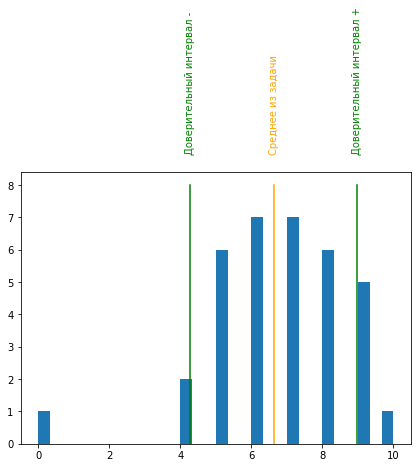

In [22]:
plt.hist(data,bins=30)
m = np.array(data).mean()

print('Среднее из задачи: % .2f ,' %m)
plt.plot([m , m], [8,0], c= 'orange')
plt.text(m, 9, 'Среднее из задачи', c= 'orange', rotation = 'vertical', ha = 'center')

delta = Z * sigma
plt.plot([m-delta , m-delta], [8,0], c= 'green')
plt.text(m-delta, 9, 'Доверительный интервал -', c= 'green', rotation = 'vertical', ha = 'center')

plt.plot([m+delta , m+delta], [8,0], c= 'green')
plt.text(m+delta, 9, 'Доверительный интервал +', c= 'green', rotation = 'vertical', ha = 'center')
print(f'\t Дельта = {delta:.2f} , \n \t {confidence *100:.0f}% доверительный интервал = {mean_confidence_interval:.1f} .')

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [23]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:

In [24]:
n1 = len(data_1)
n2 = len(data_2)
sigma1 = stats.sem(data_1, ddof = 1)
sigma2 = stats.sem(data_2, ddof = 1)
print(f'n1= {n1}, n2= {n2}, sigma1= {sigma1:.2f}, sigma2= {sigma2:.2f}')

# проверим являются ли распределения нормальными. используем критерий Шапиро-Уилка:
st1, p1 = stats.shapiro(data_1)  # критерий Шапиро-Уилка
st2, p2 = stats.shapiro(data_2)  # критерий Шапиро-Уилка
print(f'p1 =  {p1:.3f}, p2 =  {p2:.3f}')

confidence = 0.05 # примем порог 5%
if (p1 > confidence) and (p2 > confidence): print('Распределения нормальны')
else: print('критерий Шапиро-Уилка: Распределения НЕ нормальны')

n1= 35, n2= 93, sigma1= 0.33, sigma2= 0.18
p1 =  0.014, p2 =  0.015
критерий Шапиро-Уилка: Распределения НЕ нормальны


In [25]:
# Проверим на нормальность тестом по критериею согласия Пирсона:
st1, p1 = stats.normaltest(data_1) # Критерий согласия Пирсона
st2, p2 = stats.normaltest(data_2) # Критерий согласия Пирсона
print(f'p1 =  {p1:.3f}, p2 =  {p2:.3f}')

confidence = 0.05 # примем порог 5%
if (p1 > confidence) and (p2 > confidence): print('Распределения нормальны')
else: print('Критерий согласия Пирсона: Распределения НЕ нормальны')

p1 =  0.004, p2 =  0.981
Критерий согласия Пирсона: Распределения НЕ нормальны


p1 =  0.014
критерий Шапиро-Уилка: Распределение НЕ нормально


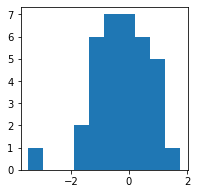

In [26]:
# Нормализируем
rcParams['figure.figsize'] = 3,3
from sklearn.preprocessing import StandardScaler 
data_1_transformed = StandardScaler().fit_transform(np.array(data_1).reshape(-1,1) )
plt.hist(data_1_transformed,bins = 10)

# критерий Шапиро-Уилка
st1, p1 = stats.shapiro(data_1_transformed)  
print(f'p1 =  {p1:.3f}')

if (p1 > confidence): print('Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')

p1 =  0.014
критерий Шапиро-Уилка: Распределение НЕ нормально


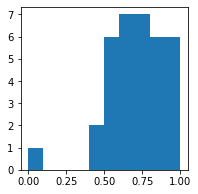

In [27]:
# MinMaxScaling
from sklearn.preprocessing import MinMaxScaler 
data_1_transformed = MinMaxScaler().fit_transform(np.array(data_1).reshape(-1,1))
plt.hist(data_1_transformed ,bins = 10)

# критерий Шапиро-Уилка
st1, p1 = stats.shapiro(data_1_transformed)  
print(f'p1 =  {p1:.3f}')

if (p1 > confidence): print('Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')

p1 =  0.272
критерий Шапиро-Уилка: Распределение нормально


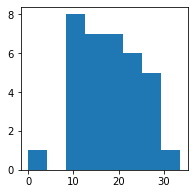

In [28]:
#BoxCox
data_1_transformed = stats.boxcox([x+1 for x in data_1])[0]
plt.hist(data_1_transformed,bins=8)

# критерий Шапиро-Уилка
st1, p1 = stats.shapiro(data_1_transformed)  
print(f'p1 =  {p1:.3f}')

if (p1 > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')

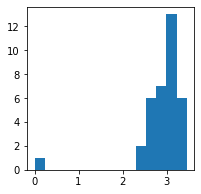

In [29]:
#log2
plt.hist(np.log2( [x+1 for x in data_1] ), bins=15)
print()

p1 =  0.272
критерий Шапиро-Уилка: Распределение нормально


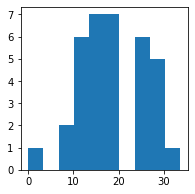

In [30]:
#yeojohnson
data_1_transformed = stats.yeojohnson(data_1)[0]
plt.hist(data_1_transformed,bins = 10)

# критерий Шапиро-Уилка
st1, p1 = stats.shapiro(data_1_transformed)  
print(f'p1 =  {p1:.3f}')

if (p1 > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')

In [31]:
# Поскольку в выборках все значения положительны, то используем метод BoxCox   
# проверим как отличаются отклонения, для этого используем критерий Фишера. Если он меньше  порога 0.05 то принимаем нулевую гипотезу, что отлонения (дисперсии) не отличаются.
confidence = 0.05

data_1_transformed = stats.boxcox([x+1 for x in data_1])[0]
data_2_transformed = stats.boxcox([x+1 for x in data_2])[0]
sigma1 = stats.sem(data_1_transformed)
sigma2 = stats.sem(data_2_transformed)
print(f'n1= {n1}, n2= {n2}, sigma1= {sigma1:.2f}, sigma2= {sigma2:.2f}')

criteria_F = sigma1 / sigma2
f = 1 - stats.f.cdf(criteria_F, n2-1, n1-1)
print( f'criteria_F = {criteria_F:.2f}, f = {f}')
if (f < confidence): print('критерий Фишера: H0 = True: отлонения (дисперсии) равны')
else: print('критерий Фишера: H0 != True: отлонения (дисперсии) отличаются')

n1= 35, n2= 93, sigma1= 1.23, sigma2= 0.18
criteria_F = 6.77, f = 1.0792640781076557e-08
критерий Фишера: H0 = True: отлонения (дисперсии) равны


In [32]:
#т.к критерий Фишера с большой веротяностью указывает, что отклонения не сильно отличаются друг от друга (нулевая гипотеза), то можно применять критерий стьюдента и указывать equal_var = True
student_criteria = stats.ttest_ind(data_1_transformed,data_2_transformed, equal_var = True)
print(f'Критерий Стьюдента = {student_criteria[1]}')
if student_criteria[1] < confidence: 
    print('\t критерий Стьюдента: H0 != True: Распределения различаются') 
    print('\t Zero hypothesis is dissmissed. Difference between samples is significant.')
else: 
    print('\t критерий Стьюдента: H0 = True: Распределения НЕ различаются')
    print('\t Zero hypothesis is confirmed. Difference between samples is negligeable.') 

Критерий Стьюдента = 6.808825581679214e-37
	 критерий Стьюдента: H0 != True: Распределения различаются
	 Zero hypothesis is dissmissed. Difference between samples is significant.


### H0 != True. Распределения не принадлежат одной ГС

Text(3.930019865909306, 27, 'Среднее data_2_BoxCox')

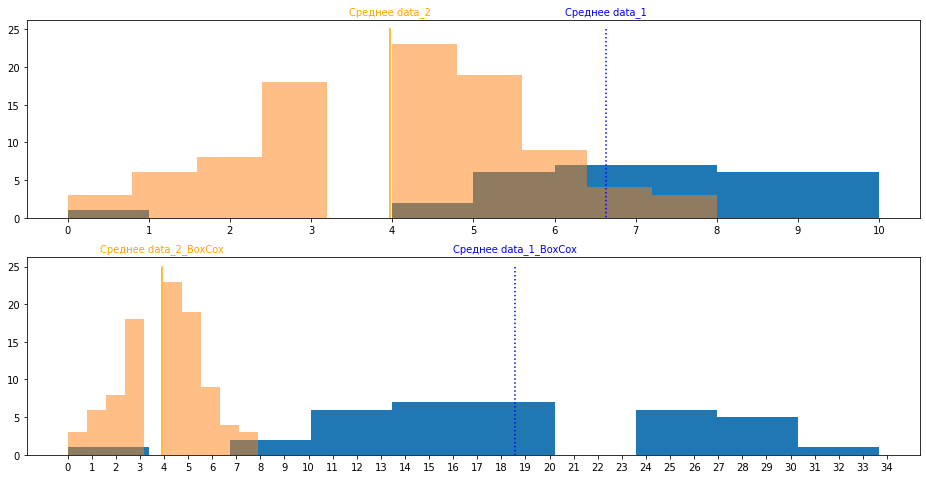

In [33]:
#hist
rcParams['figure.figsize'] = 16,8
fig = plt.figure()
fig.add_subplot(211)

plt.hist(data_1,bins = 10)
plt.hist(data_2,bins = 10,alpha = 0.5)
plt.xticks(range(11))

m_1 = np.array(data_1).mean()
plt.plot([m_1 , m_1], [25,0],':m', c= 'blue')
plt.text(m_1, 27, 'Среднее data_1', c= 'blue', rotation = 'horizontal', ha = 'center')

m_2 = np.array(data_2).mean()
plt.plot([m_2 , m_2], [25,0], c= 'orange')
plt.text(m_2, 27, 'Среднее data_2', c= 'orange', rotation = 'horizontal', ha = 'center')

fig.add_subplot(212)
plt.hist(data_1_transformed,bins = 10)
plt.hist(data_2_transformed,bins = 10,alpha = 0.5)
plt.xticks(range(35))

m_1 = np.array(data_1_transformed).mean()
plt.plot([m_1 , m_1], [25,0],':m', c= 'blue')
plt.text(m_1, 27, 'Среднее data_1_BoxCox', c= 'blue', rotation = 'horizontal', ha = 'center')

m_2 = np.array(data_2_transformed).mean()
plt.plot([m_2 , m_2], [25,0], c= 'orange')
plt.text(m_2, 27, 'Среднее data_2_BoxCox', c= 'orange', rotation = 'horizontal', ha = 'center')

### По Гистограмме видно, что распределения отличаются как по форме, амплитуде, так и по средним значениям

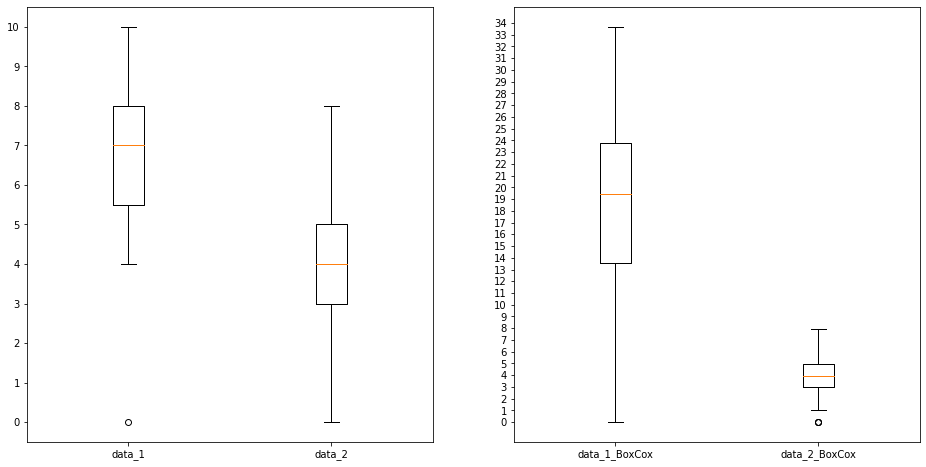

In [34]:
#boxplot

fig = plt.figure()
ax = fig.add_subplot(121)
data = [data_1,data_2 ]
plt.boxplot(data, labels = ['data_1','data_2'],vert = True)
plt.yticks(range(11))

ax = fig.add_subplot(122)
data_transformed = [data_1_transformed,data_2_transformed ]
plt.boxplot(data_transformed, labels = ['data_1_BoxCox','data_2_BoxCox'],vert = True)
plt.yticks(range(35))
plt.show()

### По боксплоту можно сделать вывод, 
- медианы отличаются,
- до и после трансформации ( BoxCox) ящики выборок не совпадают, совпадают только усами. 

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

### Ваши выводы: 
Все зависит от порога: 
- Если порог 0.01 ( 1% ) или ниже, то нет основании отказаться от Нулевой Гипотезы( **Н0 - распределение нормальное** )
- Если порог 0.05 ( 5% ) или выше , то есть основания отказаться от Нулевой Гипотезы и принять Альтернативную Гипотезу (**H1 - распределение ненормальное**)

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

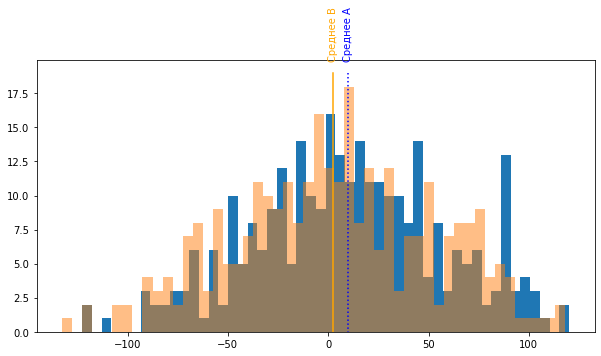

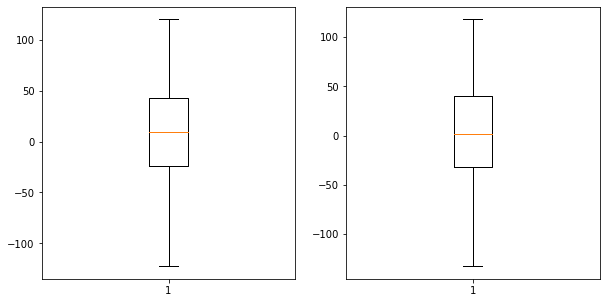

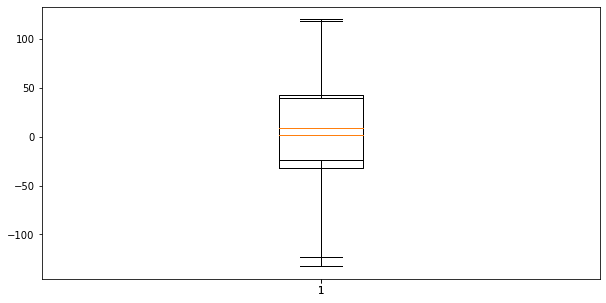

In [35]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A + stats.norm.rvs(scale=10,loc=-7.5,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

#посмотрим на выборки
rcParams['figure.figsize'] = 10,5
plt.hist(A,bins =50)
plt.hist(B,bins =50, alpha = 0.5)
m_1 = np.array(A).mean()
plt.plot([m_1 , m_1], [19,0],':m', c= 'blue')
plt.text(m_1, 20, 'Среднее A', c= 'blue', rotation = 'vertical', ha = 'center')

m_2 = np.array(B).mean()
plt.plot([m_2 , m_2], [19,0], c= 'orange')
plt.text(m_2, 20, 'Среднее B', c= 'orange', rotation = 'vertical', ha = 'center')


plt.show()

fig = plt.figure()
fig.add_subplot(121)
plt.boxplot(A)
fig.add_subplot(122)
plt.boxplot(B)
plt.show()

plt.boxplot(A)
plt.boxplot(B)
plt.show()

In [36]:
# А - Распределение нормально, это видно по условию задания. Проверим распределение В:

st2, p2 = stats.shapiro(B)  # критерий Шапиро-Уилка
print(f'p2 =  {p2:.3f}')

confidence = 0.05 # примем порог 5%
if (p2 > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')

p2 =  0.156
критерий Шапиро-Уилка: Распределение нормально


In [37]:
# проверим как отличаются отклонения, для этого используем критерий Фишера. 
#   Если он меньше  порога 0.05 то принимаем нулевую гипотезу, что отлонения (дисперсии) не отличаются.
confidence = 0.05

sigma1 = stats.sem(A)
sigma2 = stats.sem(B)
n1 = n2 = 300
print(f'sigma1= {sigma1:.2f}, sigma2= {sigma2:.2f}')

criteria_F = sigma1 / sigma2
f = 1 - stats.f.cdf(criteria_F, n2-1, n1-1)
print( f'criteria_F = {criteria_F:.2f}, f = {f:.3f}')
if (f < confidence): print('критерий Фишера: H0 = True: отлонения (дисперсии) равны')
else: print('критерий Фишера: H0 != True: отлонения (дисперсии) отличаются')

sigma1= 2.79, sigma2= 2.90
criteria_F = 0.96, f = 0.625
критерий Фишера: H0 != True: отлонения (дисперсии) отличаются


In [38]:
# проверим критерий Стьюдента для 2х связанных выборок:

confidence = 0.05
student_criteria_2smpl = stats.ttest_rel(A,B)
print(f'Критерий Стьюдента = {student_criteria_2smpl[1]}')
if student_criteria_2smpl[1] < confidence: 
    print(f'критерий Стьюдента < {confidence} --> H0 != True: Средние распределений различаются, распределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'критерий Стьюдента > {confidence} --> H0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

Критерий Стьюдента = 4.646900674640473e-31
критерий Стьюдента < 0.05 --> H0 != True: Средние распределений различаются, распределения НЕ принадлежат одной ГС с 95 % уверенностью


### Распределения не принадлежат одной ГС. Стало быть, препарат имеет какое то влияние.
Если бы порог был меньше 4.646900674640473e-31 , то тогда можно было бы сказать что выборки принадлежат одной ГС.